In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Wuppi convertido.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,0,0,2.0,3.0,1.0,5.399169,9.0,1.0,4.0,1.0,25/01/2024 09:26:42 a. m.,1.0,0.0,0.0,0.0
1,1,1,2.0,3.0,0.0,1.283400,9.0,2.0,1.0,1.0,25/01/2024 09:26:46 a. m.,1.0,0.0,0.0,0.0
2,2,2,2.0,3.0,1.0,2.700226,9.0,3.0,2.0,1.0,25/01/2024 09:26:48 a. m.,1.0,0.0,0.0,0.0
3,3,3,2.0,3.0,0.0,3.050262,9.0,4.0,2.0,1.0,25/01/2024 09:26:57 a. m.,1.0,0.0,0.0,0.0
4,4,4,2.0,3.0,0.0,4.750256,9.0,5.0,2.0,1.0,25/01/2024 09:26:58 a. m.,1.0,0.0,0.0,0.0


In [3]:
df = df.drop(columns=["Unnamed: 0.1","Unnamed: 0","fecha"])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Administrador          5865 non-null   float64
 1   Usuario                5865 non-null   float64
 2   botón correcto         5865 non-null   float64
 3   tiempo de interacción  5865 non-null   float64
 4   mini juego             5865 non-null   float64
 5   número de interacción  5865 non-null   float64
 6   color presionado       5865 non-null   float64
 7   dificultad             5865 non-null   float64
 8   Juego                  5865 non-null   float64
 9   auto push              5865 non-null   float64
 10  tiempo de lección      5865 non-null   float64
 11  tiempo de sesión       5865 non-null   float64
dtypes: float64(12)
memory usage: 550.0 KB


In [91]:
df_no_numerico = df.copy()
df_no_numerico

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
0,2.0,3.0,1.0,5.399169,9.0,1.0,4.0,1.0,1.0,0.0,0.000000,0.000000
1,2.0,3.0,0.0,1.283400,9.0,2.0,1.0,1.0,1.0,0.0,0.000000,0.000000
2,2.0,3.0,1.0,2.700226,9.0,3.0,2.0,1.0,1.0,0.0,0.000000,0.000000
3,2.0,3.0,0.0,3.050262,9.0,4.0,2.0,1.0,1.0,0.0,0.000000,0.000000
4,2.0,3.0,0.0,4.750256,9.0,5.0,2.0,1.0,1.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5860,1.0,30.0,99.0,99.000000,99.0,99.0,99.0,1.0,1.0,0.0,0.000000,332.240000
5861,1.0,4.0,0.0,2.135419,1.0,1.0,2.0,3.0,1.0,0.0,0.000000,0.000000
5862,1.0,4.0,99.0,99.000000,1.0,99.0,99.0,3.0,1.0,0.0,2.271806,0.000000
5863,1.0,4.0,99.0,99.000000,99.0,99.0,99.0,3.0,1.0,0.0,0.000000,6.478299


In [6]:
Corr_Factors =df.corr()
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1.head()

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
Administrador,1.000000,0.367783,0.057388,0.023198,0.006635,0.080123,0.055421,0.099609,0.080074,0.004080,0.044328,0.020546
Usuario,0.367783,1.000000,0.089893,0.079054,0.087822,0.099914,0.088253,0.100570,0.350478,0.123459,0.071091,0.023883
botón correcto,0.057388,0.089893,1.000000,0.903912,0.434521,0.691533,0.999374,0.026733,0.031036,0.035770,0.612377,0.277868
tiempo de interacción,0.023198,0.079054,0.903912,1.000000,0.395837,0.802379,0.902371,0.051854,0.057443,0.063312,0.554115,0.251431
mini juego,0.006635,0.087822,0.434521,0.395837,1.000000,0.282634,0.434362,0.086657,0.108371,0.001500,0.029536,0.642302


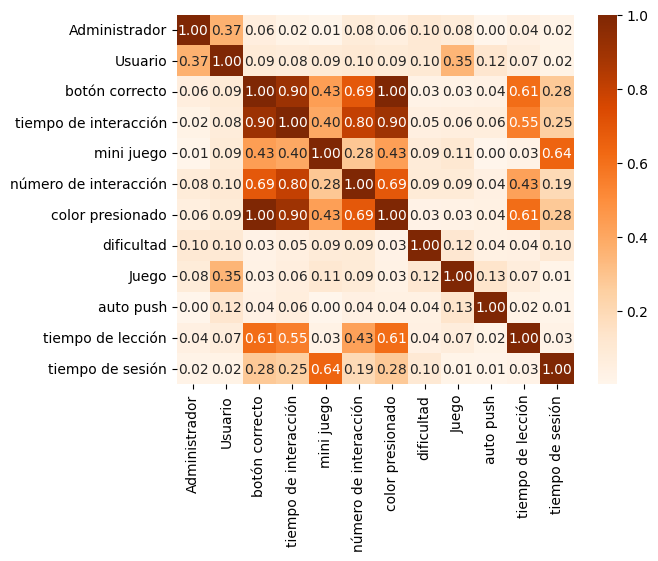

In [831]:
Heat_Map = sns.heatmap(Corr_Factors1, cmap="Oranges", annot=True, fmt=".2f")

# Analizar la correlación logística entre las variables dicotómicas
botón correcto, juego, auto push

# boton correcto
Top 3 correlciones: tiempo de interacción, número de interacción, tiempo de lección

In [7]:
unico = np.unique(df["botón correcto"])
unico

array([ 0.,  1., 99.])

In [5]:
df_no_numerico["botón correcto"]= df_no_numerico["botón correcto"].replace([0,99], "incorrecto")
df_no_numerico["botón correcto"]= df_no_numerico["botón correcto"].replace([1], "correcto")

In [834]:
df

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,Juego,auto push,tiempo de lección,tiempo de sesión
0,2.0,3.0,1.0,5.399169,9.0,1.0,4.0,1.0,1.0,0.0,0.000000,0.000000
1,2.0,3.0,0.0,1.283400,9.0,2.0,1.0,1.0,1.0,0.0,0.000000,0.000000
2,2.0,3.0,1.0,2.700226,9.0,3.0,2.0,1.0,1.0,0.0,0.000000,0.000000
3,2.0,3.0,0.0,3.050262,9.0,4.0,2.0,1.0,1.0,0.0,0.000000,0.000000
4,2.0,3.0,0.0,4.750256,9.0,5.0,2.0,1.0,1.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5860,1.0,30.0,99.0,99.000000,99.0,99.0,99.0,1.0,1.0,0.0,0.000000,332.240000
5861,1.0,4.0,0.0,2.135419,1.0,1.0,2.0,3.0,1.0,0.0,0.000000,0.000000
5862,1.0,4.0,99.0,99.000000,1.0,99.0,99.0,3.0,1.0,0.0,2.271806,0.000000
5863,1.0,4.0,99.0,99.000000,99.0,99.0,99.0,3.0,1.0,0.0,0.000000,6.478299


In [6]:
Var_Indep = df[["tiempo de interacción", "número de interacción", "tiempo de lección"]]
Var_Dep= df_no_numerico["botón correcto"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [7]:
y_pred = algoritmo.predict(X_test)
y_pred

array(['incorrecto', 'correcto', 'incorrecto', ..., 'correcto',
       'correcto', 'correcto'], shape=(1760,), dtype=object)

In [9]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="correcto")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="correcto")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[599 163]
 [379 619]]
Precision del modelo
0.6124744376278118
Exactitud del modelo
0.6920454545454545
la sensibilidad del modelo es
0.7860892388451444


In [8]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="incorrecto")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="incorrecto")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[599 163]
 [379 619]]
Precision del modelo
0.7915601023017903
Exactitud del modelo
0.6920454545454545
la sensibilidad del modelo es
0.6202404809619239


# juego 
Top 3 correlaciones mas altas: usuario, dificultad, mini juego

In [838]:
unico = np.unique(df["Juego"])
unico

array([1., 2.])

In [10]:
df_no_numerico["Juego"]= df_no_numerico["Juego"].replace([1], "astros")
df_no_numerico["Juego"]= df_no_numerico["Juego"].replace([2], "cadetes")

In [11]:
Var_Indep = df[["Usuario", "dificultad", "mini juego"]]
Var_Dep= df_no_numerico["Juego"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = algoritmo.predict(X_test)
y_pred

array(['cadetes', 'astros', 'astros', ..., 'astros', 'astros', 'astros'],
      shape=(1760,), dtype=object)

In [842]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="astros")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="astros")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[1026  136]
 [ 368  230]]
Precision del modelo
0.7360114777618364
Exactitud del modelo
0.7136363636363636
la sensibilidad del modelo es
0.882960413080895


In [13]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="cadetes")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="cadetes")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[1027  126]
 [ 350  257]]
Precision del modelo
0.6710182767624021
Exactitud del modelo
0.7295454545454545
la sensibilidad del modelo es
0.4233937397034596


# auto push 
Top 3 correlaciones 
Juego, usuario, tiempo de interacción

In [843]:
unico = np.unique(df["auto push"])
unico

array([0., 1.])

In [14]:
df_no_numerico["auto push"]= df_no_numerico["auto push"].replace([1], "correcto")
df_no_numerico["auto push"]= df_no_numerico["auto push"].replace([0], "incorrecto")

In [15]:
Var_Indep = df[["color presionado", "Usuario", "tiempo de interacción"]]
Var_Dep= df_no_numerico["auto push"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = algoritmo.predict(X_test)
y_pred

array(['incorrecto', 'incorrecto', 'incorrecto', ..., 'incorrecto',
       'incorrecto', 'incorrecto'], shape=(1760,), dtype=object)

In [847]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="correcto")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="correcto")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[   0   16]
 [   0 1744]]
Precision del modelo
0.0
Exactitud del modelo
0.990909090909091
la sensibilidad del modelo es
0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="incorrecto")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="incorrecto")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[   0   15]
 [   2 1743]]
Precision del modelo
0.9914675767918089
Exactitud del modelo
0.9903409090909091
la sensibilidad del modelo es
0.9988538681948425


# 5 

# color presionado(5)
tiempo de interacción,  número de interacción, tiempo de lección

## color rojo 

In [ ]:
#unico = np.unique(df["color presionado"])
#unico

array([ 1.,  2.,  3.,  4.,  5., 99.])

In [ ]:
#df_no_numerico["color presionado"]= df_no_numerico["color presionado"].replace([5], "rojo")
#df_no_numerico["color presionado"]= df_no_numerico["color presionado"].replace([1,2,3,4,99], "otros colores")

In [ ]:
#Var_Indep = df[["tiempo de interacción", "número de interacción", "tiempo de lección"]]
#Var_Dep= df_no_numerico["color presionado"]
#X = Var_Indep
#y = Var_Dep
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
#escala= StandardScaler()
#X_train = escala.fit_transform(X_train)
#X_test = escala.transform(X_test)
#from sklearn.linear_model import LogisticRegression
#algoritmo= LogisticRegression()
#algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#y_pred = algoritmo.predict(X_test)
#y_pred

array(['otros colores', 'otros colores', 'otros colores', ...,
       'otros colores', 'otros colores', 'otros colores'],
      shape=(1760,), dtype=object)

In [ ]:
#from sklearn.metrics import confusion_matrix
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="otros colores")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="otros colores")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

Matriz de confusión
[[1752    0]
 [   8    0]]
Precision del modelo
0.9954545454545455
Exactitud del modelo
0.9954545454545455
la sensibilidad del modelo es
1.0


In [ ]:
#from sklearn.metrics import confusion_matrix
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="rojo")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="rojo")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

# violeta

In [ ]:
#df_no_numerico["color presionado"]= df_no_numerico["color presionado"].replace([1], "violeta")
#df_no_numerico["color presionado"]= df_no_numerico["color presionado"].replace([2,3,4,5,99], "otros colores")

In [ ]:
#Var_Indep = df[["tiempo de interacción", "número de interacción", "tiempo de lección"]]
#Var_Dep= df_no_numerico["color presionado"]
#X = Var_Indep
#y = Var_Dep
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
#escala= StandardScaler()
#X_train = escala.fit_transform(X_train)
#X_test = escala.transform(X_test)
#from sklearn.linear_model import LogisticRegression
#algoritmo= LogisticRegression()
#algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#y_pred = algoritmo.predict(X_test)
#y_pred

array(['otros colores', 'otros colores', 'otros colores', ...,
       'otros colores', 'otros colores', 'otros colores'],
      shape=(1760,), dtype=object)

In [ ]:
#from sklearn.metrics import confusion_matrix
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="violeta")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="violeta")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

Matriz de confusión
[[1331    0]
 [ 370   59]]
Precision del modelo
1.0
Exactitud del modelo
0.7897727272727273
la sensibilidad del modelo es
0.13752913752913754


In [ ]:
#from sklearn.metrics import confusion_matrix
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="otros colores")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="otros colores")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

Matriz de confusión
[[1331    0]
 [ 370   59]]
Precision del modelo
0.7824808935920047
Exactitud del modelo
0.7897727272727273
la sensibilidad del modelo es
1.0


##  verde

In [ ]:
#df_no_numerico["color presionado"]= df_no_numerico["color presionado"].replace([2], "verde")
#df_no_numerico["color presionado"]= df_no_numerico["color presionado"].replace([1,3,4,5,99], "otros colores")

In [ ]:
#Var_Indep = df[["tiempo de interacción", "número de interacción", "tiempo de lección"]]
#Var_Dep= df_no_numerico["color presionado"]
#X = Var_Indep
#y = Var_Dep
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
#escala= StandardScaler()
#X_train = escala.fit_transform(X_train)
#X_test = escala.transform(X_test)
#from sklearn.linear_model import LogisticRegression
#algoritmo= LogisticRegression()
#algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#y_pred = algoritmo.predict(X_test)
#y_pred

array(['otros colores', 'otros colores', 'otros colores', ...,
       'otros colores', 'otros colores', 'otros colores'],
      shape=(1760,), dtype=object)

In [ ]:
#from sklearn.metrics import confusion_matrix
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="verde")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="verde")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

Matriz de confusión
[[1368    0]
 [ 392    0]]
Precision del modelo
0.0
Exactitud del modelo
0.7772727272727272
la sensibilidad del modelo es
0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#from sklearn.metrics import confusion_matrix#
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="otros colores")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="otros colores")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

Matriz de confusión
[[1390    0]
 [ 370    0]]
Precision del modelo
0.7897727272727273
Exactitud del modelo
0.7897727272727273
la sensibilidad del modelo es
1.0


## amarillo

In [ ]:
#df_no_numerico["color presionado"]= df_no_numerico["color presionado"].replace([3], "amarillo")
#df_no_numerico["color presionado"]= df_no_numerico["color presionado"].replace([1,2,4,5,99], "otros colores")

In [ ]:
#Var_Dep= df_no_numerico["color presionado"]
#X = Var_Indep
#y = Var_Dep
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
#escala= StandardScaler()
#X_train = escala.fit_transform(X_train)
#X_test = escala.transform(X_test)
#from sklearn.linear_model import LogisticRegression
#algoritmo= LogisticRegression()
#algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#y_pred = algoritmo.predict(X_test)
#y_pred

array(['otros colores', 'otros colores', 'otros colores', ...,
       'otros colores', 'otros colores', 'otros colores'],
      shape=(1760,), dtype=object)

In [ ]:
#from sklearn.metrics import confusion_matrix
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="amarillo")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="amarillo")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

Matriz de confusión
[[   0  386]
 [   0 1374]]
Precision del modelo
0.0
Exactitud del modelo
0.7806818181818181
la sensibilidad del modelo es
0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#from sklearn.metrics import confusion_matrix
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="otros colores")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="otros colores")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

Matriz de confusión
[[   0  373]
 [   0 1387]]
Precision del modelo
0.7880681818181818
Exactitud del modelo
0.7880681818181818
la sensibilidad del modelo es
1.0


## azul

In [40]:
df_no_numerico["color presionado"]= df_no_numerico["color presionado"].replace([4], "azul")
df_no_numerico["color presionado"]= df_no_numerico["color presionado"].replace([1,2,3,5,99], "otros colores")

In [41]:
Var_Indep = df[["tiempo de interacción", "número de interacción", "tiempo de lección"]]
Var_Dep= df_no_numerico["color presionado"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = algoritmo.predict(X_test)
y_pred

array(['otros colores', 'otros colores', 'otros colores', ...,
       'otros colores', 'otros colores', 'otros colores'],
      shape=(1760,), dtype=object)

In [37]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="azul")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="azul")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[   0  363]
 [   0 1397]]
Precision del modelo
0.0
Exactitud del modelo
0.79375
la sensibilidad del modelo es
0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="otros colores")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="otros colores")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[   0  360]
 [   0 1400]]
Precision del modelo
0.7954545454545454
Exactitud del modelo
0.7954545454545454
la sensibilidad del modelo es
1.0


# dificultad
Top 3: Juego, tiempo de sesión, Usuario

In [870]:
unico = np.unique(df["dificultad"])
unico

array([1., 2., 3., 4.])

In [44]:
df_no_numerico["dificultad"]= df_no_numerico["dificultad"].replace([1], "Dificultad 1")
df_no_numerico["dificultad"]= df_no_numerico["dificultad"].replace([2,3,4], "otras dificultades")

In [45]:
Var_Indep = df[["Juego", "tiempo de sesión", "Usuario"]]
Var_Dep= df_no_numerico["dificultad"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred = algoritmo.predict(X_test)
y_pred

array(['otras dificultades', 'otras dificultades', 'otras dificultades',
       ..., 'otras dificultades', 'otras dificultades',
       'otras dificultades'], shape=(1760,), dtype=object)

In [874]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="Dificultad 1")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Dificultad 1")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[   1  724]
 [   0 1035]]
Precision del modelo
1.0
Exactitud del modelo
0.5886363636363636
la sensibilidad del modelo es
0.001379310344827586


In [47]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="otras dificultades")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="otras dificultades")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[  19  660]
 [  10 1071]]
Precision del modelo
0.6187175043327556
Exactitud del modelo
0.6193181818181818
la sensibilidad del modelo es
0.9907493061979649


# mini juego (2)
Top 3: tiempo de sesión, botón correcto, color presionado

In [ ]:
unico = np.unique(df["mini juego"])
unico

In [ ]:
#df_no_numerico["mini juego"]= df_no_numerico["mini juego"].replace([1], "Asteroides")
#df_no_numerico["mini juego"]= df_no_numerico["mini juego"].replace([2,3,4,5,6,7,8,9,10,11,12,13,99], "otros mini juegos")

In [ ]:
#Var_Indep = df[["tiempo de sesión", "botón correcto", "color presionado"]]
#Var_Dep= df_no_numerico["mini juego"]
#X = Var_Indep
#y = Var_Dep
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
#escala= StandardScaler()
#X_train = escala.fit_transform(X_train)
#X_test = escala.transform(X_test)
#from sklearn.linear_model import LogisticRegression
#algoritmo= LogisticRegression()
#algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#y_pred = algoritmo.predict(X_test)
#y_pred

array(['otros mini juegos', 'otros mini juegos', 'otros mini juegos', ...,
       'otros mini juegos', 'otros mini juegos', 'otros mini juegos'],
      shape=(1760,), dtype=object)

In [ ]:
#from sklearn.metrics import confusion_matrix
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="Asteroides")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Asteroides")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

Matriz de confusión
[[   0  317]
 [   0 1443]]
Precision del modelo
0.0
Exactitud del modelo
0.8198863636363637
la sensibilidad del modelo es
0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#from sklearn.metrics import confusion_matrix
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="otros mini juegos")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="otros mini juegos")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

Matriz de confusión
[[   0  343]
 [   0 1417]]
Precision del modelo
0.8051136363636363
Exactitud del modelo
0.8051136363636363
la sensibilidad del modelo es
1.0


## Restaurante

In [64]:
df_no_numerico["mini juego"]= df_no_numerico["mini juego"].replace([2], "restaurantes")
df_no_numerico["mini juego"]= df_no_numerico["mini juego"].replace([1,3,4,5,6,7,8,9,10,11,12,13,99], "otros mini juegos")

In [65]:
Var_Indep = df[["tiempo de sesión", "botón correcto", "color presionado"]]
Var_Dep= df_no_numerico["mini juego"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [66]:
y_pred = algoritmo.predict(X_test)
y_pred

array(['otros mini juegos', 'otros mini juegos', 'otros mini juegos', ...,
       'otros mini juegos', 'otros mini juegos', 'otros mini juegos'],
      shape=(1760,), dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="restaurantes")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="restaurantes")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[1511    0]
 [ 249    0]]
Precision del modelo
0.0
Exactitud del modelo
0.8585227272727273
la sensibilidad del modelo es
0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [67]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="otros mini juegos")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="otros mini juegos")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[1487    0]
 [ 273    0]]
Precision del modelo
0.8448863636363636
Exactitud del modelo
0.8448863636363636
la sensibilidad del modelo es
1.0


# numero de interacción
Top: tiempo de interacción, botón correcto, color presionado

In [48]:
Max=df["número de interacción"].max()
Min=df["número de interacción"].min()
Limites=[Min, Max]
Limites

[np.float64(1.0), np.float64(256.0)]

In [49]:
intervalos = np.linspace(0.9, 256.1, 3)
intervalos

array([  0.9, 128.5, 256.1])

In [50]:
categorias = ["Menor de 128s", "Mayor de 128.5s"]

In [51]:
df_no_numerico["número de interacción"]=pd.cut(x=df_no_numerico["número de interacción"], bins=intervalos, labels= categorias)

In [52]:
Var_Indep = df[["tiempo de interacción", "botón correcto", "color presionado"]]
Var_Dep= df_no_numerico["número de interacción"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = algoritmo.predict(X_test)
y_pred

array(['Menor de 128s', 'Menor de 128s', 'Menor de 128s', ...,
       'Menor de 128s', 'Menor de 128s', 'Menor de 128s'],
      shape=(1760,), dtype=object)

In [56]:
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="Menor de 128s")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Menor de 128s")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[  12   18]
 [   1 1729]]
Precision del modelo
0.9896966227819118
Exactitud del modelo
0.9892045454545455
la sensibilidad del modelo es
0.999421965317919


In [57]:
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="Mayor de 128.5s")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Mayor de 128.5s")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[  12   18]
 [   1 1729]]
Precision del modelo
0.9230769230769231
Exactitud del modelo
0.9892045454545455
la sensibilidad del modelo es
0.4


# usuario(5)
Administrador, Juego, auto push

In [892]:
print(df['Usuario'].unique()) 

[ 3. 18.  1. 14. 17. 11.  9.  8. 13. 16. 22. 12. 10. 20. 15. 26. 28. 32.
  6. 27. 19.  5. 29. 21. 25. 31. 23.  7.  2.  4. 24. 30.]


## Leonardo (1)

In [ ]:
#df_no_numerico["Usuario"]= df_no_numerico["Usuario"].replace([1], "Leonardo")
#df_no_numerico["Usuario"]= df_no_numerico["Usuario"].replace([3,18,14,17,11,9,8,13,16,22,12,10,20,15,26,28,32,6,27,19,5,29,21,25,31,23,7,2,4,24,30], "otros usuarios")

In [ ]:
#Var_Indep = df[["Administrador", "Juego", "auto push"]]
#Var_Dep= df_no_numerico["Usuario"]
#X = Var_Indep
#y = Var_Dep
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
#escala= StandardScaler()
#X_train = escala.fit_transform(X_train)
#X_test = escala.transform(X_test)
#from sklearn.linear_model import LogisticRegression
#algoritmo= LogisticRegression()
#algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#y_pred = algoritmo.predict(X_test)
#y_pred

array(['otros usuarios', 'otros usuarios', 'otros usuarios', ...,
       'otros usuarios', 'otros usuarios', 'otros usuarios'],
      shape=(1760,), dtype=object)

In [ ]:
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="Leonardo")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Leonardo")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

Matriz de confusión
[[   0  278]
 [   0 1482]]
Precision del modelo
0.0
Exactitud del modelo
0.8420454545454545
la sensibilidad del modelo es
0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="otros usuarios")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="otros usuarios")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

Matriz de confusión
[[   0  264]
 [   0 1496]]
Precision del modelo
0.85
Exactitud del modelo
0.85
la sensibilidad del modelo es
1.0


## Ma del Rosario (24)

In [ ]:
#df_no_numerico["Usuario"]= df_no_numerico["Usuario"].replace([24], "Ma del Rosario")
#df_no_numerico["Usuario"]= df_no_numerico["Usuario"].replace([3,18,14,17,11,9,8,13,16,22,12,10,20,15,26,28,32,6,27,19,5,29,21,25,31,23,7,2,4,1,30], "otros usuarios")

In [ ]:
#Var_Indep = df[["Administrador", "Juego", "auto push"]]
#Var_Dep= df_no_numerico["Usuario"]
#X = Var_Indep
#y = Var_Dep
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
#escala= StandardScaler()
#X_train = escala.fit_transform(X_train)
#X_test = escala.transform(X_test)
#from sklearn.linear_model import LogisticRegression
#algoritmo= LogisticRegression()
#algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#y_pred = algoritmo.predict(X_test)
#y_pred

array(['otros usuarios', 'otros usuarios', 'otros usuarios', ...,
       'otros usuarios', 'otros usuarios', 'otros usuarios'],
      shape=(1760,), dtype=object)

In [ ]:
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="Ma del Rosario")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Ma del Rosario")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

Matriz de confusión
[[   0   19]
 [   0 1741]]
Precision del modelo
0.0
Exactitud del modelo
0.9892045454545455
la sensibilidad del modelo es
0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="otros usuarios")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="otros usuarios")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

Matriz de confusión
[[   0   19]
 [   0 1741]]
Precision del modelo
0.9892045454545455
Exactitud del modelo
0.9892045454545455
la sensibilidad del modelo es
1.0


## Nicolas (3)

In [ ]:
#df_no_numerico["Usuario"]= df_no_numerico["Usuario"].replace([3], "Nicolas")
#df_no_numerico["Usuario"]= df_no_numerico["Usuario"].replace([24,18,14,17,11,9,8,13,16,22,12,10,20,15,26,28,32,6,27,19,5,29,21,25,31,23,7,2,4,1,30], "otros usuarios")

In [ ]:
#Var_Indep = df[["Administrador", "Juego", "auto push"]]
#Var_Dep= df_no_numerico["Usuario"]
#X = Var_Indep
#y = Var_Dep
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
#escala= StandardScaler()
#X_train = escala.fit_transform(X_train)
#X_test = escala.transform(X_test)
#from sklearn.linear_model import LogisticRegression
#algoritmo= LogisticRegression()
#algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#y_pred = algoritmo.predict(X_test)
#y_pred

array(['otros usuarios', 'otros usuarios', 'otros usuarios', ...,
       'otros usuarios', 'otros usuarios', 'otros usuarios'],
      shape=(1760,), dtype=object)

In [ ]:
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="Nicolas")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Nicolas")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

Matriz de confusión
[[   0  165]
 [   0 1595]]
Precision del modelo
0.0
Exactitud del modelo
0.90625
la sensibilidad del modelo es
0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="otros usuarios")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="otros usuarios")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

Matriz de confusión
[[   0  172]
 [   0 1588]]
Precision del modelo
0.9022727272727272
Exactitud del modelo
0.9022727272727272
la sensibilidad del modelo es
1.0


## Rene (27)

In [ ]:
#df_no_numerico["Usuario"]= df_no_numerico["Usuario"].replace([27], "Rene")
#df_no_numerico["Usuario"]= df_no_numerico["Usuario"].replace([24,18,14,17,11,9,8,13,16,22,12,10,20,15,26,28,32,6,3,19,5,29,21,25,31,23,7,2,4,1,30], "otros usuarios")

In [ ]:
#Var_Indep = df[["Administrador", "Juego", "auto push"]]
#Var_Dep= df_no_numerico["Usuario"]
#X = Var_Indep
#y = Var_Dep
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
#escala= StandardScaler()
#X_train = escala.fit_transform(X_train)
#X_test = escala.transform(X_test)
#from sklearn.linear_model import LogisticRegression
#algoritmo= LogisticRegression()
#algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#y_pred = algoritmo.predict(X_test)
#y_pred

array(['otros usuarios', 'otros usuarios', 'otros usuarios', ...,
       'otros usuarios', 'otros usuarios', 'otros usuarios'],
      shape=(1760,), dtype=object)

In [ ]:
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="Rene")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Rene")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

Matriz de confusión
[[   0   12]
 [   0 1748]]
Precision del modelo
0.0
Exactitud del modelo
0.9931818181818182
la sensibilidad del modelo es
0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#matriz = confusion_matrix(y_test, y_pred)
#print("Matriz de confusión")
#print(matriz)
#from sklearn.metrics import precision_score
#precision = precision_score(y_test, y_pred, average="binary", pos_label="otros usuarios")
#print("Precision del modelo")
#print(precision)
#from sklearn.metrics import accuracy_score
#exactitud = accuracy_score(y_test, y_pred)
#print("Exactitud del modelo")
#print(exactitud)
#from sklearn.metrics import recall_score
#sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="otros usuarios")
#print("la sensibilidad del modelo es")
#print(sensibilidad)

Matriz de confusión
[[   0   12]
 [   0 1748]]
Precision del modelo
0.9931818181818182
Exactitud del modelo
0.9931818181818182
la sensibilidad del modelo es
1.0


## Sergio Angel (8)

In [97]:
df_no_numerico["Usuario"]= df_no_numerico["Usuario"].replace([8], "Sergio Angel")
df_no_numerico["Usuario"]= df_no_numerico["Usuario"].replace([24,18,14,17,11,9,27,13,16,22,12,10,20,15,26,28,32,6,3,19,5,29,21,25,31,23,7,2,4,1,30], "otros usuarios")

In [103]:
Var_Indep = df[["Administrador", "Juego", "auto push"]]
Var_Dep= df_no_numerico["Usuario"]
X = Var_Indep
y = Var_Dep
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)
escala= StandardScaler()
X_train = escala.fit_transform(X_train)
X_test = escala.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo= LogisticRegression()
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [104]:
y_pred = algoritmo.predict(X_test)
y_pred

array(['otros usuarios', 'otros usuarios', 'otros usuarios', ...,
       'otros usuarios', 'otros usuarios', 'otros usuarios'],
      shape=(1760,), dtype=object)

In [105]:
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="Sergio Angel")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Sergio Angel")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[   0   76]
 [   0 1684]]
Precision del modelo
0.0
Exactitud del modelo
0.9568181818181818
la sensibilidad del modelo es
0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [106]:
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de confusión")
print(matriz)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="binary", pos_label="otros usuarios")
print("Precision del modelo")
print(precision)
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo")
print(exactitud)
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="otros usuarios")
print("la sensibilidad del modelo es")
print(sensibilidad)

Matriz de confusión
[[   0   76]
 [   0 1684]]
Precision del modelo
0.9568181818181818
Exactitud del modelo
0.9568181818181818
la sensibilidad del modelo es
1.0
